In [1]:
import numpy as np
import pandas as pd
import segyio
import tqdm
import matplotlib
import cv2
from PIL import Image
import os

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename_trn_full = '/Final_Cube.sgy'

In [ ]:
# не обязательно
with segyio.open(filename_trn_full, ignore_geometry=True) as segyfile:
    segyfile.mmap()
    
    sourceX = segyfile.attributes(segyio.TraceField.SourceX)[:]
    sourceY = segyfile.attributes(segyio.TraceField.SourceY)[:]
    nsum = segyfile.attributes(segyio.TraceField.NSummedTraces)[:]

In [3]:
a = 0.03984685807490432
b = -0.003464844810092342
c = 0.003464590863682925
d = 0.03984901661938436

def Tr(x, y):
    return ((x - 313711)*a + (y - 6604467)*b, (x - 313711)*c + (y - 6604467)*d)

In [ ]:
# не обязательно
plt.figure(figsize=(20,20))
x_source, y_source = Tr(sourceX, sourceY)
plt.scatter(x_source, y_source, c=nsum, edgecolor='none')

# Small area mask

In [4]:
mask_x_min = 206
mask_x_max = 599

mask_y_min = 0
mask_y_max = 286

mask_matrix = np.zeros((394, 287, 475))

In [5]:
path ="/горизонты/small_area" 
filelist = []
for root, dirs, files in os.walk(path):
    for file in files: 
        filelist.append(os.path.join(root,file))

In [6]:
for filelist_name in filelist:
    print(filelist_name)
    with open(filelist_name, 'r') as f:
        all_str = f.readlines()
        l = len(all_str)
        x = np.zeros(l)
        y = np.zeros(l)
        z = np.zeros(l)
        for i in range(l):
            d = all_str[i].split(' ')
            x[i] = np.float32(d[0])
            y[i] = np.float32(d[1])
            z[i] = np.float32(d[2])
        x = np.array(x)
        y = np.array(y)
        z = np.array(z)
        
    a = 0.03984685807490432
    b = -0.003464844810092342
    c = 0.003464590863682925
    d = 0.03984901661938436

    def Tr(x, y):
        return ((x - 313711)*a + (y - 6604467)*b, (x - 313711)*c + (y - 6604467)*d)
        
    x, y = Tr(x, y)
    x = np.round(x, decimals=0)
    y = np.round(y, decimals=0)
    z = np.round(z/2, decimals=0)
    
    mask_coord = np.array(list(zip(x, y, z)))
    

    for i in range(len(mask_coord)):
        x_m, y_m, z_m = mask_coord[i]
        x_m, y_m, z_m = int(x_m), int(y_m), int(z_m)
        if y_m >= 0.0:
            mask_matrix[x_m - mask_x_min, y_m, z_m] = 1


/горизонты/small_area\T0_A1_small
/горизонты/small_area\T0_A_small
/горизонты/small_area\T0_F_small
/горизонты/small_area\T0_K1_small
/горизонты/small_area\T0_K2_small
/горизонты/small_area\T0_M2_small
/горизонты/small_area\T0_U1_small


In [7]:
srez = np.zeros((901, 475))

In [11]:
# исходный текстовый файл был порезан на 1401 файлов, соответствующих срезам куба с зафиксированной y (т.е плоскасть xz)
# резал с помощью пролграммы penguin big data editor
# по 427 975 строк в каждый файл
with open("./porezka/Final_Cube.ascii_67.txt", 'r') as f:
    for i in range(901):
        for j in range(475):
            srez[i, j] = np.float32(f.readline().split('\t')[3])

<Figure size 1440x1440 with 0 Axes>

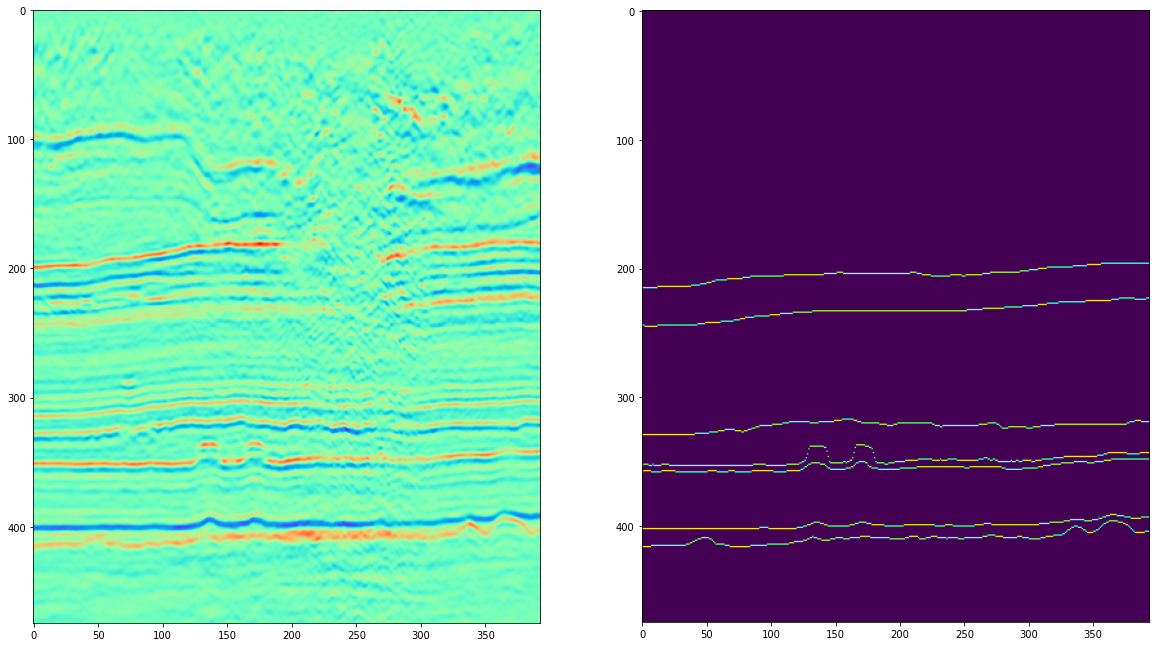

In [12]:
# отрисовка
plt.figure(figsize=(20,20))
img = srez[206:599].T
img_1 = mask_matrix.transpose(1, 0, 2)[67].T
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[0].imshow(img, cmap='rainbow')
plt.imshow(img_1, )

plt.show()


In [ ]:
np.save('small_area_mask', mask_matrix)

In [13]:
del(mask_matrix)

# Every 200 mask

In [14]:
mask_matrix = np.zeros((901, 1401, 475))

In [15]:
path ="/горизонты/every200" 
filelist = []
for root, dirs, files in os.walk(path):
    for file in files: 
        filelist.append(os.path.join(root,file))


In [16]:
for filelist_name in filelist:
    print(filelist_name)
    with open(filelist_name, 'r') as f:
        all_str = f.readlines()
        l = len(all_str)
        x = np.zeros(l)
        y = np.zeros(l)
        z = np.zeros(l)
        for i in range(l):
            d = all_str[i].split(' ')
            x[i] = np.float32(d[0])
            y[i] = np.float32(d[1])
            z[i] = np.float32(d[2])
        x = np.array(x)
        y = np.array(y)
        z = np.array(z)
        
    a = 0.03984685807490432
    b = -0.003464844810092342
    c = 0.003464590863682925
    d = 0.03984901661938436

    def Tr(x, y):
        return ((x - 313711)*a + (y - 6604467)*b, (x - 313711)*c + (y - 6604467)*d)
        
    x, y = Tr(x, y)
    x = np.round(x, decimals=0)
    y = np.round(y, decimals=0)
    z = np.round(z/2, decimals=0)
    
    max_y = np.max(y)
    
    mask_coord = np.array(list(zip(x, y, z)))
    
            
    for i in range(len(mask_coord)):
        x_m, y_m, z_m = mask_coord[i]
        x_m, y_m, z_m = int(x_m), int(y_m), int(z_m)
        if y_m >= 0.0:
            mask_matrix[x_m, y_m, z_m] = 1

/горизонты/every200\T0_A1_every200
/горизонты/every200\T0_A_every200
/горизонты/every200\T0_F_every200
/горизонты/every200\T0_K1_every200
/горизонты/every200\T0_K2_every200
/горизонты/every200\T0_M2_every200
/горизонты/every200\T0_U1_every200


In [17]:
with open("./porezka/Final_Cube.ascii_200.txt", 'r') as f:
    for i in range(901):
        for j in range(475):
            srez[i, j] = np.float32(f.readline().split('\t')[3])

In [18]:
with segyio.open(filename_trn_full) as segyfile:
    data_il = []
    data_x = []
    for il in range(0, 1401, 200):
        data_il.append(segyfile.iline[segyfile.ilines[il]])
    for x in range(0, 901, 200):
        data_x.append(segyfile.xline[segyfile.xlines[x]])
    data_il = np.array(data_il)
    data_x = np.array(data_x)

<Figure size 2880x2880 with 0 Axes>

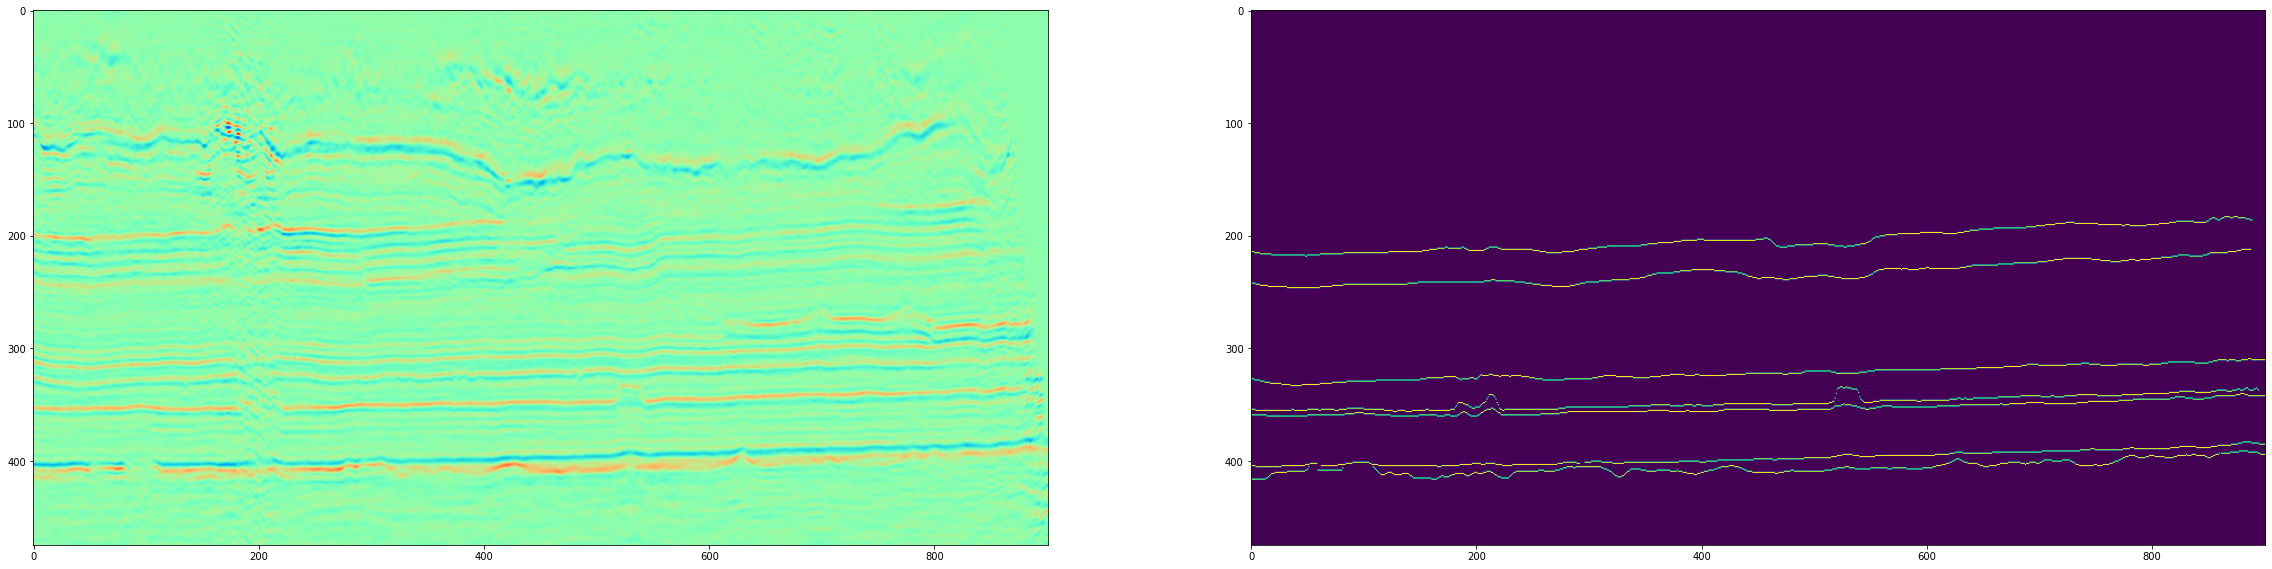

In [19]:
plt.figure(figsize=(40,40))
img = data_il[1].T
img_1 = mask_matrix.transpose(1,0,2)[200].T
fig, axs = plt.subplots(1, 2, figsize=(40, 40))
axs[0].imshow(img, cmap='rainbow')
axs[1].imshow(img_1,)

plt.show()

In [20]:
# ничего лучше, как сохранять это в полноразмерной матрице я не придумал
# поэтому эта штука весит 4 гб
# но там 99% нули, поэтому оно архивируется
np.save('every_200_mask', mask_matrix)